Group 14: Enye Botha, Ron Degani, Michelle Deng, Ben Hall

**Problem Statement:**

Given the daily temperature, precipitation, and humidity from January 1st, 1997 to December 31st, 2024, as well as the total frequency of customers in January and July 2025, model the expected total annual income of Loafe Cafe.

**Variables and Parameters**


$$
\begin{array}{cccc}
\textbf{Description} & \textbf{Symbol} & \textbf{Units} & \textbf{Type} \\
\hline \text{Total Daily Customers} & C & 1 & \text{Random Variable} \\
\hline \text{Average Daily Temperature} & T & K & \text{Random Variable} \\
\hline \text{Total Daily Precipitation} & P & mm & \text{Random Variable} \\
\hline \text{Daily Humidity} & H & \% & \text{Random Variable} \\
\hline \text{Reference number of Customers} & C_{0} & 1 & \text{Parameter} \\
\hline \text{Reference Temperature} & T_{0} & K & \text{Parameter} \\
\hline \text{Reference Precipitation} & P_{0} & K & \text{Parameter} \\
\hline \text{Reference Humidity} & H_{0} & \% & \text{Parameter} \\
\hline \text{Rate of change of customers with respect to (square) temperature} & a & T^{-1} & \text{Parameter} \\
\hline \text{Rate of change of customers with respect to precipitation} & b & T^{-1} & \text{Parameter} \\
\hline \text{Rate of change of customers with respect to (square) humidity} & c & T^{-1} & \text{Parameter} \\
\hline \text{Spend amount of each customer} & S & \$ & \text{Parameter} \\
\hline \text{Daily cost of operation} & L & \$ & \text{Parameter} \\
\hline
\end{array}
$$

**Assumptions and Constraints**
* Both locations have the same weather conditions.
* Assume that the daily average temperature, precipitation, and humidity are constant for the entire day.
* Assume revenue is proportional to the number of customers and is greater than or equal to 0.
* Both locations are open 7:00AM-4:00PM every day of the year.
* No other climate factors effects on the number of customers except for the ones mentioned.
* Assume that neither location runs out of product to sell and product does not go bad.
* Assume that Loafe cafe has a constant cost $L$, which includes the cost of operation for both locations.
* The rate of change of customers with respect to the varying random variables is positive, whether the number of customers increases or decreases with an increase in a given random variable is taken into account by our equation. Namely, a, b, c $\ge 0.$
* The spend amount of each customer, S, is greater than or equal to 0.

**Building the Model**

The first equation gives the daily income of Loafe cafe, whereas the following equation gives the daily number of customers based on the average daily temperature, daily precipitation and and daily humidity.

$$
\begin{align}
\text{Income} & = S\cdot C(T,P, H) - L\\
C(T,P, H) & = \max \{C_0 + a(T-T_0)^2 - b(P-P_0) - c(H-H_0)^2, 0\} \\
\end{align}
$$

In [ ]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random

In [ ]:
# loading the datasets
df1 = pd.read_csv('https://raw.githubusercontent.com/bothaenye/Modeling-Assignment-Two/main/customer_data_2025.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/bothaenye/Modeling-Assignment-Two/main/weatherstats_vancouver_daily_2025.csv')

In [ ]:
# getting the numbers of days
days = len(df2[df2['Year'] == 2024])
summer_days = 92

In [ ]:
# collecting the data for the two different months
january = np.array(df1['January_Frequency_Customers_Alumni_Centre'] + df1['January_Frequency_Customers_Sauder'])
july = np.array(df1['July_Frequency_Customers_Alumni_Centre'] + df1['July_Frequency_Customers_Sauder'])

In [ ]:
def model(a, b, c, k, j, axs, plt, unc):
  customers_mc = []
  for i in range(N):
      if (unc == 1):
        a = a + stats.norm.rvs(0, 1, 1)
        b = b + stats.norm.rvs(0, 1, 1)
        c = c + stats.norm.rvs(0, 1, 1)
      T = T0 + kde_T.resample(days - summer_days)
      H = H0 + kde_T.resample(days - summer_days)
      P = P0 + kde_T.resample(days - summer_days)
      C = C0 + a*(T-T0)**2 - b*(P-P0) - c*(H-H0)**2

      T1 = T0 + np.random.normal(0, stdT, summer_days)
      H1 = H0 + np.random.normal(0, stdH, summer_days)
      P1 = P0 + np.random.normal(0, stdP, summer_days)
      C_summer = C1 + a*(T1-T0)**2 - b*(P1-P0) - c*(H1-H0)**2

      customers = np.sum(np.append(C, C_summer))
      customers_mc.append(customers)

  customers_mc = np.array(customers_mc)
  x = np.linspace(np.min(customers_mc), np.max(customers_mc), 300)
  kde = stats.gaussian_kde(customers_mc)

  if (j == -1):
    axs[k].hist(customers_mc, bins=75, density=True, color = "lightblue")
    axs[k].plot(x, kde(x))
  else:
    axs[k][j].hist(customers_mc, bins=75, density=True, color = "lightpink")
    axs[k][j].plot(x, kde(x))

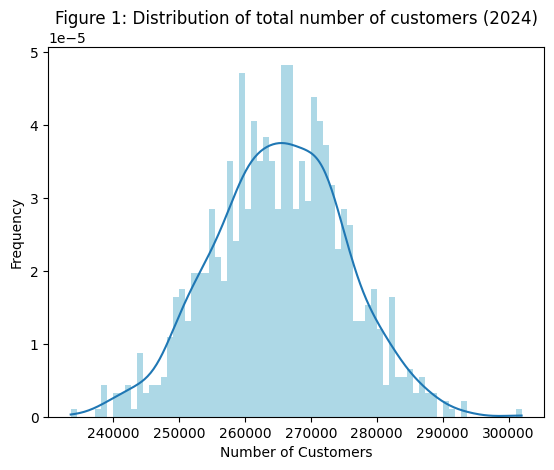

In [ ]:
# visualizing the distribution of our model
T_arr = np.array(df2["temperature"])
H_arr = np.array(df2["humidity"])
P_arr = np.array(df2["precipitation"])

x = df2["Day"]

T0 = np.mean(T_arr)
H0 = np.mean(H_arr)
P0 = np.mean(P_arr)

stdT = np.std(T_arr)
stdH = np.std(H_arr)
stdP = np.std(P_arr)

C0 = np.mean(january)
C1 = np.mean(july)

a = 3
b = 3
c = 3

kde_T = stats.gaussian_kde(T_arr)
kde_H = stats.gaussian_kde(H_arr)
kde_P = stats.gaussian_kde(P_arr)

N = 1000
customers_mc = []
for i in range(N):
    T = T0 + kde_T.resample(days - summer_days)
    H = H0 + kde_T.resample(days - summer_days)
    P = P0 + kde_T.resample(days - summer_days)
    C = C0 + a*(T-T0)**2 - b*(P-P0) - c*(H-H0)**2

    T1 = T0 + np.random.normal(0, stdT, summer_days)
    H1 = H0 + np.random.normal(0, stdH, summer_days)
    P1 = P0 + np.random.normal(0, stdP, summer_days)
    C_summer = C1 + a*(T1-T0)**2 - b*(P1-P0) - c*(H1-H0)**2

    customers = np.sum(np.append(C, C_summer))
    customers_mc.append(customers)

customers_mc = np.array(customers_mc)
customers_mc_3 = customers_mc
x = np.linspace(np.min(customers_mc), np.max(customers_mc), 300)
kde = stats.gaussian_kde(customers_mc)

plt.hist(customers_mc, bins=75, density=True, color = "lightblue")
plt.plot(x, kde(x))
plt.title("Figure 1: Distribution of total number of customers (2024)")
plt.xlabel("Number of Customers"), plt.ylabel("Frequency")
plt.show()

**Analysis and Results**

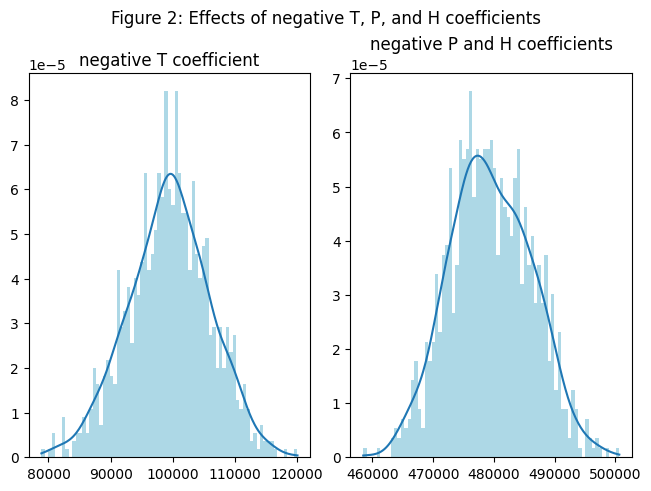

In [ ]:
# Visualizing our model with different signs for a, b, and c
fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig.suptitle("Figure 2: Effects of negative T, P, and H coefficients", fontsize=12)

model(-2, 2, 2, 0, -1, axs, plt, 0)
axs[0].set_title("negative T coefficient",fontsize=12)

model(2, -2, -2, 1, -1, axs, plt, 0)
axs[1].set_title("negative P and H coefficients",fontsize=12)
plt.show()

**The graphs above show that a negative coefficent for Temperature (a) will reduce the quanitity of customers drastically, while negative coefficients for Precipitation (b) and Humidity (c) will increase the number of customers. This enforces our assumption that the scaling factors a, b, and c have positive values to represent our model, thus this suggests customers will increase with an increase in temperature, and decrease with an increase in precipitation and humidity.**

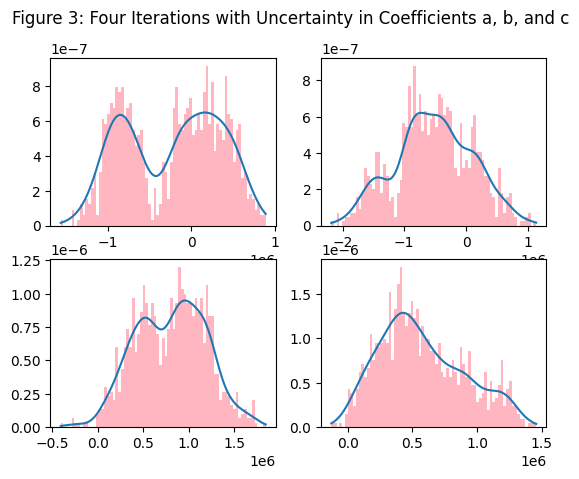

In [ ]:
# Constructing our model with undertainty in a, b, and c
# Introducing Error into our Coefficients
fig, axs = plt.subplots(2, 2)
fig.suptitle("Figure 3: Four Iterations with Uncertainty in Coefficients a, b, and c")

model(0, 0, 0, 0, 0, axs, plt, 1)

## second iteration
model(0, 0, 0, 0, 1, axs, plt, 1)

# third iteration
model(0, 0, 0, 1, 0, axs, plt, 1)

# fourth iteration
model(0, 0, 0, 1, 1, axs, plt, 1)
plt.show()

**The graphs above showcase the effect of introducing uncertainty into the parameters a, b, and c. The model becomes bimodal (generally, after running it mutliple times the occasional graph is trimodal, and even more seldomly, unimodal), as the probability density function now showing two distinct peaks. The peaks shape and location vary drastically from graph to graph, with the parameters varying very slightly.**

We assume that the amount each customer purchases follows a normal distribution with a mean of \$12 and standard deviation of \$5 ( $S=\$12 \pm \$5 $). From there, we take the original distribution of total number of customers, along with an assumed constant daily cost (in this case $30) to find a distribution for the total annual income.

In [ ]:
# @title
# Income, using original customers_mc and a daily cost of 30
# The amount that each customer spends is 12 +- 5
income = []
for it in customers_mc_3:
  if (it > 0):
    i = int(it)
    revenue = 12 * i + np.sum(np.random.normal(loc=0.0, scale=5,size=i)) - 30 * days
    income.append(revenue)

income_kde = stats.gaussian_kde(income)
income_x = np.linspace(np.min(income), np.max(income), 300)
plt.hist(income,bins = 50, density=True, color = "lightblue")
plt.plot(income_x, income_kde(income_x))
plt.title("Figure 4: Distribution of Total Annual Income (2024)")
plt.axvline(x = np.mean(income), color = 'r')
plt.xlabel("Annual Total Income"), plt.ylabel("Frequency")
plt.show()


In [ ]:
print(f'The mean total income of Loafe cafe in 2024 comes to ${np.mean(income):.2f}')

By introducing uncertainty, our model becomes a bimodal probability density function. This suggests that there are two points of attention that represent customer response under the given circumstances. As these peaks vary drastically even with slight changes in the parameter, it may be indicative of potential instability in our underlying assumptions.
The scaling factors are all positive, implying that the number of customers increases with rising temperature, and decreases with rising precipitation and humidity. Our model is consistent with the intuitive value that summer is the peak season for the hospitality industry.


We made several simplifying assumptions that may not fully reflect real-world conditions. During our initial analysis of the data given we found that another big factor on the number of customers is the time of year or week, which we did try to take into account when we split the days of the year into two sets: the regular semesters and the summer semester. This does mean that we are looking at an additional factor that isn't the weather, but it does help with the accuracy of our model quite a bit. Therefore, we changed the assumption to read that there are no other climate factors other than the ones stated to better reflect our process.

Furthermore, we assumed that Loafe Cafe is open every day, allowing us to look at time without any discontinous intervals. In reality, opening hours can fluctuate due to operating constraints and unexpected closures. Additionally, each location has differing schedules. Our model is unable to fully capture such motions. Accounting for such variables could be interesting to examine in future models.

Another limitation of our model is that it does not take customer preference into account. We decided to treat the two locations as one due to their proximity (270 meters). With this treatment, we inherently assume uniform activity across both branches. In another iteration, we could apply the model to each location individually and analyze how the locations differ from one another.

In this model we decided to focus on the effect of the weather on the the number of customers, rather than examining uncertainties in how much each customer spent would affect the total income, in order to streamline our model. Along with this, we assumed that Loafe Cafe would never run out of product and would have a fixed cost to simplify the model further and focus solely on the effect of the weather. In future iterations of this model, we could look into tailoring the parameter values more closely to reality, as our findings highlight opportunities to find model adjustments that are able to produce more accurate parameter estimates. An example would be access to Loafe Cafe's transaction data.

**Bibliography**

[1] Loafe Cafe. https://loafe-cafe.square.site/#most-popular (2025).
